**SVM**

In [46]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
#Load dataset
cancer = datasets.load_breast_cancer()
print("Fitur: ", cancer.feature_names)

# print label
print("Label: ", cancer.target_names)

Fitur:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label:  ['malignant' 'benign']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42) 

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
Accuracy: 0.9649122807017544


**RVM**

In [23]:
!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

     / 10 kB 4.5 MB/s
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-py3-none-any.whl size=4240 sha256=baa1356f1d089765c1631c06362af91aa291f20f66913d49e212a81c5da347c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-s4dpjw3w/wheels/38/4d/8c/6c26199fcff73720c62e1cae6779b5a921fb96938369026086
Successfully built scikit-rvm


In [51]:
from skrvm import RVC
cancer = datasets.load_breast_cancer()
clf = RVC()
clf.fit(cancer.data, cancer.target)

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,coef1=None, degree=3, kernel='rbf', n_iter=3000, n_iter_posterior=50,threshold_alpha=1000000000.0, tol=0.001, verbose=False)
y_pred = clf.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
Accuracy: 1.0


In [59]:
x_kecil = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
x_kecilTes=np.array([
             [6,8],
             [9,5],
             [0.3,1],
             [1,0.2],
             [10,11]])
y_kecil = [0,1,0,1,0,1]
y_kecilTes = [1,1,0,0,1]

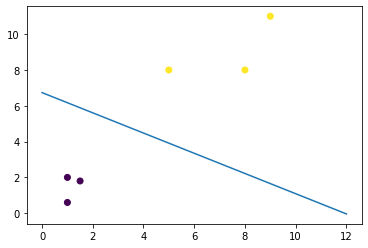

Accuracy: 1.0


In [62]:
#svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(x_kecil,y_kecil)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy)

plt.scatter(x_kecil[:, 0], x_kecil[:, 1], c = y_kecil)

plt.show()
y_kecilPred=clf.predict(x_kecilTes)
print("Accuracy:",metrics.accuracy_score(y_kecilTes, y_kecilPred))

In [70]:
!pip install sklearn-rvm

/usr/local/lib/python3.7/dist-packages/sklearn_rvm/em_rvm.py:679: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


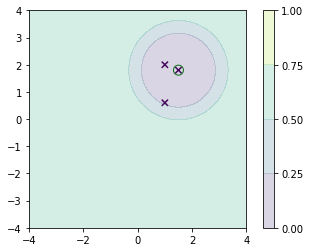

In [71]:
#rvm
from sklearn_rvm import EMRVC
model = EMRVC(kernel="rbf")
model.fit(x_kecil, y_kecil)

x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_kecil[:, 0], x_kecil[:, 1], s=40, c=y_kecil, marker="x")
plt.scatter(model.relevance_vectors_[:, 0], model.relevance_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contourf(x0, x1, model.predict_proba(x)[:, 1].reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal", adjustable="box")